# Feature Selection

## Numerical Features only

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

data = pd.read_csv("smartphones.csv")
del data['model']
del data['brand_name']
del data['processor_brand']
del data['os']

data = data.dropna()

y = pd.DataFrame(data['price'])
X = data.drop('price', axis=1)
print(y.count())


f_scores, p_values = f_regression(X, y.to_numpy().ravel())

X = SelectKBest(f_regression, k=15).fit_transform(X, y)

price    687
dtype: int64


c:\Users\andre\Documents\Github\Mobile-Phone-Price-Prediction\.venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## LabelEncoder

In [ ]:
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

data = pd.read_csv("smartphones.csv")

label_encoder_brand = LabelEncoder()
data['brand_name_encoded'] = label_encoder_brand.fit_transform(data['brand_name'])
data['processor_brand_encoded'] = label_encoder_brand.fit_transform(data['processor_brand'])
data['os_encoded'] = label_encoder_brand.fit_transform(data['os'])

del data['model']
del data['brand_name']
del data['processor_brand']
del data['os']

data = data.dropna()


X = data.drop('price', axis=1)


f_scores, p_values = f_regression(X, y)

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'P-Value': p_values
}).sort_values(by='F-Score', ascending=False)

# Display the feature importance scores
print(feature_scores)

                      Feature  F-Score  P-Value
8             internal_memory   227.94     0.00
3             processor_speed   225.04     0.00
0                  avg_rating   191.73     0.00
7                ram_capacity   154.37     0.00
14  extended_memory_available   130.98     0.00
19                 os_encoded    72.54     0.00
15          resolution_height    67.07     0.00
6               fast_charging    56.20     0.00
10               refresh_rate    49.15     0.00
1                   5G_or_not    33.58     0.00
16           resolution_width    26.38     0.00
13       primary_camera_front    18.94     0.00
9                 screen_size    17.35     0.00
17         brand_name_encoded     9.47     0.00
4            battery_capacity     7.08     0.01
18    processor_brand_encoded     2.82     0.09
11           num_rear_cameras     1.62     0.20
12        primary_camera_rear     1.38     0.24
2                   num_cores     0.96     0.33
5     fast_charging_available     0.00  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Target Encoder

In [ ]:
#Trying Target Encoder
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import TargetEncoder
import pandas as pd


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

data = pd.read_csv("smartphones.csv")
y = data['price']

#encoder = TargetEncoder(smooth="auto", target_type="continuous")
#print(data[['brand_name']])
#print(y)
#for col in ['brand_name', 'processor_brand', 'os']:
    # Fit and transform, then flatten to 1D array
   # encoded = encoder.fit_transform(data[[col]], y).ravel()
    #data[f"{col}_encoded"] = encoded

encoder = TargetEncoder(target_type="continuous")
data['brand_name_encoded'] = encoder.fit_transform(data[['brand_name']], y).ravel()
data['processor_brand_encoded'] = encoder.fit_transform(data[['processor_brand']], data['price'])
data['os_encoded'] = encoder.fit_transform(data[['os']], data['price'])

del data['model']
del data['brand_name']
del data['processor_brand']
del data['os']

data = data.dropna()

y = data['price']
X = data.drop('price', axis=1)


f_scores, p_values = f_regression(X, y)

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'P-Value': p_values
}).sort_values(by='F-Score', ascending=False)

# Display the feature importance scores
print(feature_scores)

                      Feature  F-Score  P-Value
8             internal_memory   227.94     0.00
3             processor_speed   225.04     0.00
0                  avg_rating   191.73     0.00
7                ram_capacity   154.37     0.00
14  extended_memory_available   130.98     0.00
18    processor_brand_encoded    67.19     0.00
15          resolution_height    67.07     0.00
17         brand_name_encoded    65.42     0.00
19                 os_encoded    57.18     0.00
6               fast_charging    56.20     0.00
10               refresh_rate    49.15     0.00
1                   5G_or_not    33.58     0.00
16           resolution_width    26.38     0.00
13       primary_camera_front    18.94     0.00
9                 screen_size    17.35     0.00
4            battery_capacity     7.08     0.01
11           num_rear_cameras     1.62     0.20
12        primary_camera_rear     1.38     0.24
2                   num_cores     0.96     0.33
5     fast_charging_available     0.00  

# New Section

[18560.11135838] [18999.]
[39248.88200415] [33749.]
[15342.53002721] [13999.]
[17464.45942875] [15490.]
[15384.65240572] [17859.]
[12390.55168074] [10799.]
[22585.42240286] [24820.]
[26025.63558214] [24494.]
[16696.38919697] [13999.]
[23658.16172807] [27999.]
[15689.22521965] [14439.]
[14055.84529497] [12999.]
[27714.48968275] [24999.]
[33018.69088122] [49990.]
[21698.18723493] [19999.]
[18189.80850492] [29999.]
[43221.35879473] [48990.]
[35804.4205619] [24999.]
[15369.6566591] [12999.]
[24816.70721691] [19999.]
[51436.08270885] [43999.]
[14449.5638862] [13999.]
[14449.5638862] [13999.]
[7415.84080002] [7999.]
[26244.35128419] [29990.]
[49332.50970217] [57999.]
[18241.70362137] [15499.]
[26244.35128419] [21999.]
[25114.99007971] [24999.]
[32140.07721359] [34999.]
[24849.57978748] [23994.]
[13289.16393778] [17999.]
[15886.14527902] [14490.]
[14121.75761016] [16490.]
[13945.27878847] [11999.]
[15996.34029278] [19999.]
[39035.83284617] [45999.]
[8721.85322491] [11990.]
[40277.34054048] [4

c:\Users\andre\Documents\Github\Mobile-Phone-Price-Prediction\.venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


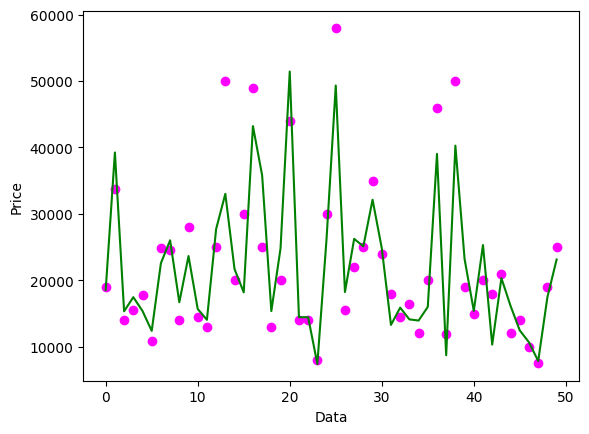

In [46]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc_X = StandardScaler()
sc_y = StandardScaler()
scaled_X = sc_X.fit_transform(X)
scaled_y = sc_y.fit_transform(y.to_numpy().reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y)


from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', epsilon=0.05)
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)
pred = pd.DataFrame(pred)

predicted_price = sc_y.inverse_transform(pred)
real_price = sc_y.inverse_transform(y_test)
from sklearn.metrics import root_mean_squared_error

for est, real in zip(predicted_price, real_price):
  print(est, real)

print(f"Train accuracy: {regressor.score(X_train, y_train)}")
print(f"Test accuracy: {regressor.score(X_test, y_test)}")
print(root_mean_squared_error(real_price, predicted_price))

graph_points = 50
plt.scatter(range(graph_points), real_price[:graph_points], color = 'magenta')
plt.plot(range(graph_points), predicted_price[:graph_points], color = 'green')
plt.xlabel('Data')
plt.ylabel('Price')
plt.show()